# Set-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import textwrap

# for custom system fonts
import os
from matplotlib import font_manager as fm

In [2]:
# grab system font
fpath = os.path.join('/Users/marley/Library/Fonts/CENSCBK.TTF')
prop = fm.FontProperties(fname=fpath, size=10)
fname = os.path.split(fpath)[1]   

# ** Choose File **

# % Graphs

In [137]:
file = 'ch7_fig34.csv'
s = pd.read_csv(file)
s = s.set_index(s.iloc[:,0])
s = s.drop(s.iloc[:,0].name, axis=1)
#g = g.drop('Diff', axis=1)
#g.Urban = g.Urban.str[:-1].astype(float) / 100
#g.Rural = g.Rural.str[:-1].astype(float) / 100
#g = g.iloc[:4,:2]
#g = g.dropna()
s

,Urban,Rural,<$25k,≥$100k,<BA,≥BA
High and Low Cultural Capital Goods Expenditure,,,,,,
Soft Drinks,0.0210,0.0230,0.0267,0.0197,0.0247,0.0202
Tobacco,0.0004,0.0007,0.0013,0.0003,0.0009,0.0004
Frozen Meals,0.0340,0.0340,0.0390,0.0300,0.0360,0.0330
Organic Milk,0.0340,0.0190,0.0140,0.0440,0.0170,0.0320
Fresh Vegetables,0.0150,0.0150,0.0120,0.0170,0.0130,0.0160


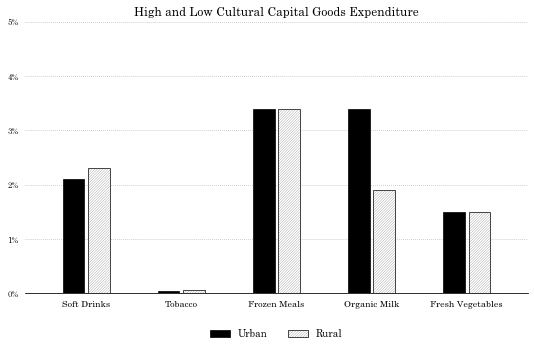

In [12]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name#[:-11]
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            height = height + .0075
        else:
            height = height - .035
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]


bar1 = ax.bar(x1, g.Urban, width, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2, g.Rural, width, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
ax.bar(g.index, 0)

#autolabel(bar1)
#autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.25).round(2)))
#ax.set(ylim=(0, 1))
#ax.set(ylim=(-.5, .5))
plt.show()

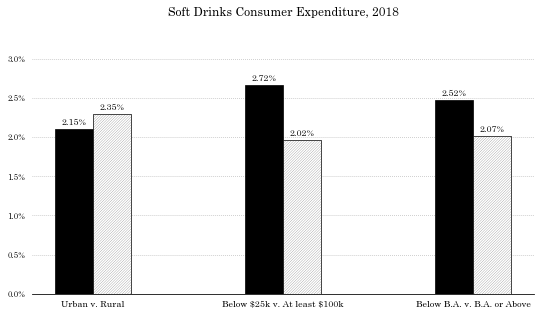

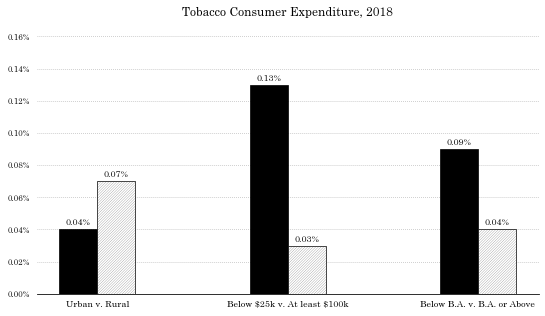

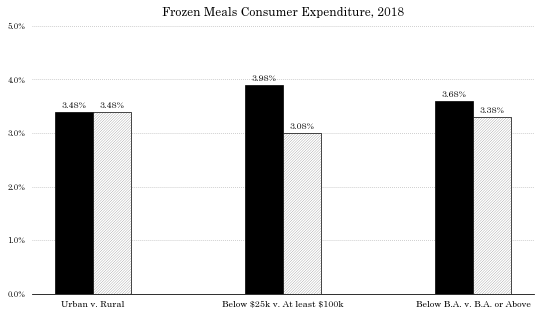

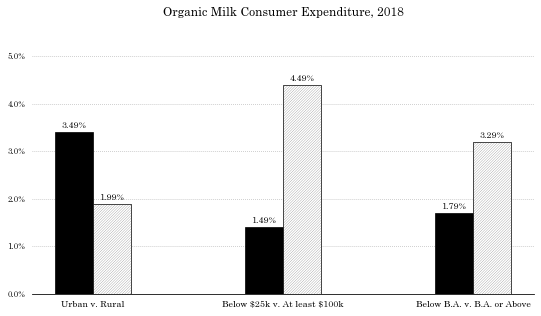

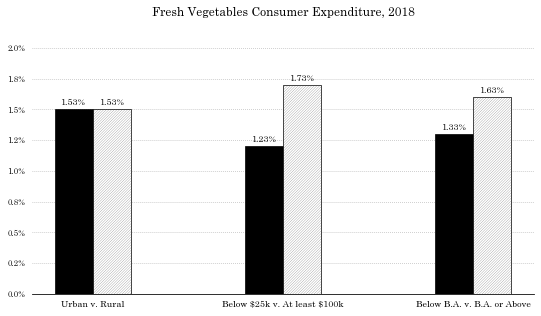

In [167]:
# set graph specs
#legendheight = -0.2
w = 0.2
bartextsize = 9
filename = file[:-4]

for col in s.T.columns:
    
    g = s.T.loc[:, col]
    
    fig, ax = plt.subplots(figsize=(9,5))
    ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
    plt.rcParams['hatch.linewidth'] = .15

    bar1 = ax.bar(0 - w/2, g.iloc[0], w, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
    bar2 = ax.bar(0 + w/2, g.iloc[1], w, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
    bar3 = ax.bar(1 - w/2, g.iloc[2], w, zorder=3, label='<$25k', color='black', edgecolor='black', lw=.7)
    bar4 = ax.bar(1 + w/2, g.iloc[3], w, zorder=3, label='≥$100k', color='white', edgecolor='black', hatch='/////////', lw=.7)
    bar5 = ax.bar(2 - w/2, g.iloc[4], w, zorder=3, label='<BA', color='black', edgecolor='black', lw=.7)
    bar6 = ax.bar(2 + w/2, g.iloc[5], w, zorder=3, label='≥BA', color='white', edgecolor='black', hatch='/////////', lw=.7)

    # define function to add label to top of bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height() + g.max() * .02
            ax.annotate(str((height * 100).round(2)) + '%',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        ha='center',
                        fontproperties=prop,
                        fontsize=bartextsize)
            
    autolabel(bar1)
    autolabel(bar2)
    autolabel(bar3)
    autolabel(bar4)
    autolabel(bar5)
    autolabel(bar6)
    
    if g.max() < 0.01:
        decimal=2
    else:
        decimal=1
    
    title = col + ' Consumer Expenditure, 2018'
    ax.set_title(title, fontproperties=prop, size=12)
    ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=decimal)) # turn y axis decimals into %s

    for label in ax.get_yticklabels():
        label.set_fontproperties(prop)
        label.set_fontsize(8) 
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(prop)
        label.set_fontsize(9)   
    
    plt.xticks(ticks=[0, 1, 2], labels=['Urban v. Rural',
                                        'Below \$25k v. At least $100k',
                                        'Below B.A. v. B.A. or Above'])

    #ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=3)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    ax.set(ylim=(0, g.max()*1.3))

    plt.show()
    
    # if good, export
    ax.get_figure().savefig(filename + '_' + col + '.jpg', dpi=300, bbox_inches='tight')